<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-results" data-toc-modified-id="Load-the-results-0.0.1">Load the results</a></span></li></ul></li></ul></li><li><span><a href="#3D-plots---BH" data-toc-modified-id="3D-plots---BH-1">3D plots - BH</a></span></li></ul></div>

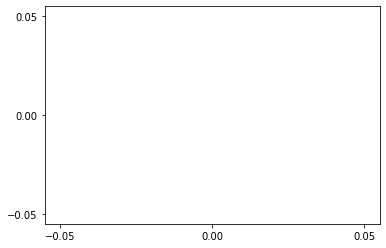

In [1]:
import torch
import seaborn as sns
from src.models import PJPE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.viz.mpl_plots import plot_superimposition, plot_2d, plot_3d
from src.trainer import project_3d_to_2d
%load_ext autoreload
%autoreload 2

### Load the results

In [2]:
# Get metrics
resume = "absurd-music-3244"
mj = 0
t_data_bh = torch.load(f"../src/results/t_data_{resume}_bh_True_mj_{mj}.pt", map_location='cpu')
# t_data_zv = torch.load(f"../src/results/t_data_{resume}_bh_False_mj_{mj}.pt", map_location='cpu')
t_data_zv = torch.load(f"../src/results/t_data_{resume}_5frame_bh_False_mj_{mj}.pt", map_location='cpu')

pjpe_bh = t_data_bh['bh']
pjpe_zv = t_data_zv['zv']
print(list(t_data_zv.keys()))

['recon_2d', 'recon_3d', 'novel_2d', 'target_2d', 'target_3d', 'z', 'action', 'recon_3d_org', 'zv']


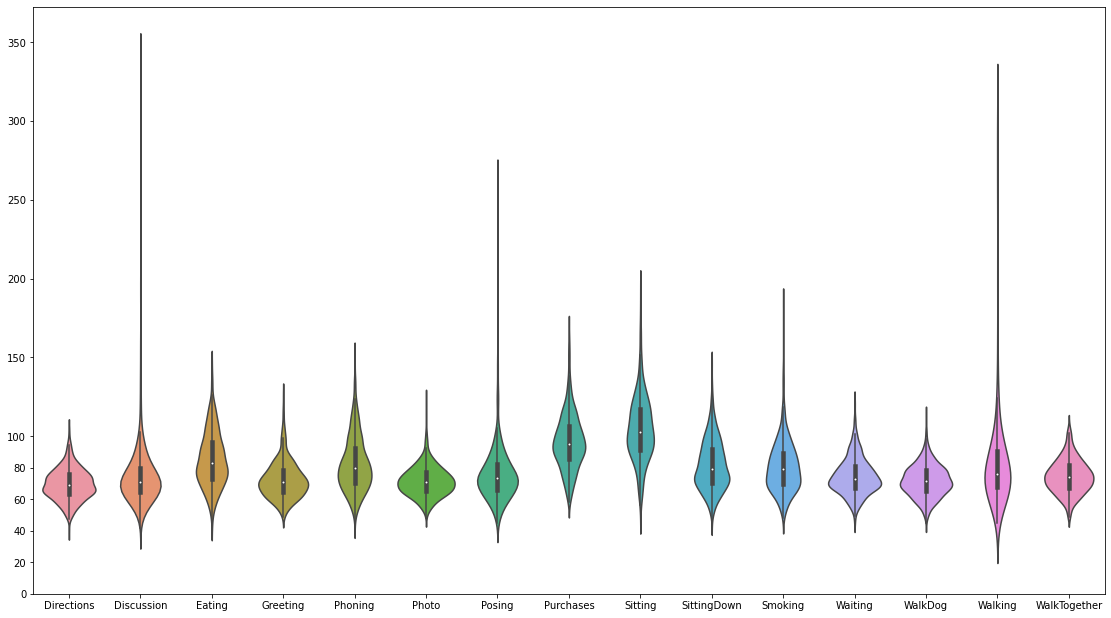

In [3]:
# Get data
pjpes = pjpe_bh.cpu().numpy()
actions = t_data_bh['action'].cpu().numpy()

ax = sns.violinplot(actions, pjpes)

ticks = list(np.arange(100, pjpes.max()+50, 50))
ticks.extend(np.arange(0,100,20))
_ = plt.setp(ax,yticks=sorted(ticks))
_ = ax.set_xticklabels(["Directions", "Discussion", "Eating", "Greeting", "Phoning", "Photo", "Posing", "Purchases",
                             "Sitting", "SittingDown", "Smoking", "Waiting", "WalkDog", "Walking", "WalkTogether"])
_ = plt.savefig("../src/results/violin_pjpe.svg", format='svg', dpi=1200)

In [87]:
# get data close to mean, min or max mpjpe
selections = []
# pjpes = pjpe_zv.cpu().numpy()
actions = t_data_zv['action']
pjpes = PJPE(t_data_zv['recon_3d'], t_data_zv['target_3d'])
pjpes = pjpes.mean(dim=1)
for a in range(2,17):
    ids_a = np.where(actions==a)
    mean_a = pjpes[ids_a].mean()
    rel = np.abs(pjpes[ids_a] - mean_a)
    id_close = rel.argmin()
    id = np.where(pjpes == pjpes[ids_a][id_close])
    selections.append(id)
    print(int(id[0]), pjpes[ids_a][id_close], a, rel.min(), mean_a)


3493 tensor(44.4427) 2 tensor(0.0002) tensor(44.4424)
6422 tensor(44.4946) 3 tensor(0.0011) tensor(44.4958)
14027 tensor(56.6362) 4 tensor(0.0016) tensor(56.6378)
74176 tensor(49.1581) 5 tensor(0.0038) tensor(49.1544)
21621 tensor(56.5976) 6 tensor(0.0003) tensor(56.5973)
26692 tensor(44.2219) 7 tensor(0.0040) tensor(44.2260)
30089 tensor(46.5027) 8 tensor(0.0059) tensor(46.4969)
33987 tensor(71.1696) 9 tensor(0.0067) tensor(71.1763)
39416 tensor(72.5576) 10 tensor(0.0044) tensor(72.5619)
94650 tensor(55.0178) 11 tensor(0.0046) tensor(55.0132)
96348 tensor(51.9833) 12 tensor(0.0049) tensor(51.9883)
54005 tensor(47.7921) 13 tensor(0.0083) tensor(47.8004)
55495 tensor(46.8667) 14 tensor(0.0038) tensor(46.8706)
106863 tensor(48.7317) 15 tensor(0.0105) tensor(48.7423)
109473 tensor(44.0025) 16 tensor(0.0035) tensor(43.9990)


In [5]:
# plots
%matplotlib notebook
%matplotlib inline
recons = t_data_zv['recon_3d']
targets = t_data_zv['recon_3d']
errors = PJPE(recons, targets).mean(dim=1)

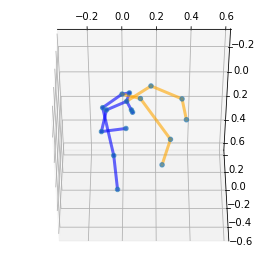

In [46]:
idx = 33987
recon_3d = recons[idx]
target_3d = targets[idx]
error = errors[idx]

recon_3d = 0.6*recon_3d/recon_3d[:,1].max()

_ = plot_3d(recon_3d.cpu().numpy(), show_ticks=True,mode='axis')
plt.show()

In [52]:
import sys
sys.path.append("../../blender-cli-rendering")
from render_pose import render
import os
%load_ext autoreload
%autoreload 2

recons = t_data_zv['recon_3d']
targets = t_data_zv['target_3d']
errors = PJPE(recons, targets).mean(dim=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
ids = [3493,6422,14027,74176,21621,26692,30089,33987,39416,94650,96348,54005,55495,106863,109473]
# ids = [33987]
ids = [94650]
for idx in ids:
    recon_3d = recons[idx]
    target_3d = targets[idx]
    error = errors[idx]

    scale = 0.47
    resolution = 100
    samplings = 100

    pose = recon_3d
    pose = scale * (pose/pose[:,1].max())
    pose=pose.tolist()

    render(resolution = resolution, samplings=samplings, pose=pose,gt=None, error=None, color=0, out_dir=f"{os.environ['HOME']}/lab/HPE3D/renders/{idx}_pred_{int(error)}")

    gt = target_3d
    gt = scale * (gt/gt[:,1].max())
    gt = gt.tolist()

    render(resolution = resolution, samplings=samplings, pose=gt,gt=None, error=None, color=1, out_dir=f"{os.environ['HOME']}/lab/HPE3D/renders/{idx}_gt_{int(error)}")

/home/datta/lab/HPE3D/renders/94650_pred_55
/home/datta/lab/HPE3D/renders/94650_gt_55


In [144]:
np.mean(pose[:][0])

0.0

# 3D plots - BH
%matplotlib notebook

n_recons = torch.stack(t_data_bh['n_recons'])

idx = 6900
for i in range(1):
    pose_3d = n_recons[i, idx, Ellipsis]
    _ = plot_3d(pose_3d.cpu().numpy() ,mode='axis')
plt.show()

In [28]:
recons.shape

torch.Size([8695, 17, 3])

In [ ]:
#### plt.clf()
%matplotlib inline

# reprojection plots
n_recons = torch.stack(t_data_bh['n_recons'])
idx = 6900
T = torch.tensor((0, 0, 10), device=n_recons.device, dtype=n_recons.dtype)

for i in range(20):
    pose_3d = n_recons[i, idx, Ellipsis]
    pose_2d = project_3d_to_2d(pose_3d+T)
    _ = plot_2d(pose_2d.cpu().numpy(), show_ticks=True, mode='axis', background=None)
plt.show()

In [19]:
a = [
        [0,            0,           0],
        [-1.2853e-01,  1.0512e-02, -5.0679e-02],
        [2.7709e-02,  2.5100e-01, -4.0710e-01],
        [1.1463e-02,  6.4020e-01, -1.8854e-01],
        [1.2853e-01, -1.0512e-02,  5.0679e-02],
        [2.5803e-01,  2.2097e-01, -3.2205e-01],
        [1.8305e-01,  6.0340e-01, -1.0381e-01],
        [-1.5258e-02, -2.2694e-01, -3.8681e-02],
        [7.4004e-05, -4.6908e-01, -1.3338e-01],
        [1.4456e-02, -5.1081e-01, -2.3333e-01],
        [2.9278e-03, -6.2335e-01, -2.0242e-01],
        [1.2188e-01, -4.2333e-01, -7.5336e-02],
        [2.8961e-01, -1.9935e-01, -4.9643e-02],
        [2.3501e-01, -1.7183e-01, -2.9430e-01],
        [-1.2729e-01, -4.0671e-01, -1.4703e-01],
        [-2.6958e-01, -1.6512e-01, -1.6593e-01],
        [-1.3282e-01, -8.0722e-02, -3.6027e-01]]
a = torch.tensor(a)

In [42]:
a[0]
a[10]
a[10,1] - a[0,1]
a[:,1].max()
a[:,1].min()

tensor([0., 0., 0.])

tensor([ 0.0029, -0.6234, -0.2024])

tensor(-0.6234)

tensor(0.6402)

tensor(-0.6234)

In [34]:
recon = recon_3d / recon_3d.max()
pose[10,2] - pose[0,2]

tensor([0., 0., 0.])

tensor([ 0.0970, -0.3733, -0.8134])

tensor(-0.8134)

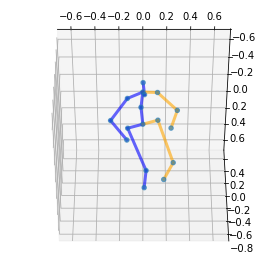

In [43]:
_ = plot_3d(a.cpu().numpy(), show_ticks=True,mode='axis')


In [85]:
import os
path = "../../Thesis/figures/zv_mean/"
for count, filename in enumerate(os.listdir(path)):
    if "pred" in filename:
        src = filename
        des = filename.split('pred_')
        des = des[0]+"pred.png"
        os.rename(path+src, path+des)

In [86]:
ids = [3493,6422,14027,74176,21621,26692,30089,33987,39416,94650,96348,54005,55495,106863,109473]
rows = 5
cols = 9
path = "../../Thesis/figures/zv_mean/"
for id in ids:
    ax = plt.add_subplot(rows, cols, i)
    ax.imshow()

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_subplot'